In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [24]:
coords = [(48.8566, 2.3522), (43.2965, 5.3698), (47.2184, -1.5536), (43.6108, 3.8767), (50.6292, 3.0573),
          (48.1173, -1.6778), (43.6043, 1.4437), (47.4784, -0.0638), (48.3904, -4.4861), (45.7640, 4.8357), 
          (49.4431, 1.0993), (43.7023, 7.2692), (44.8378, -0.5792), (46.2276, 2.2137), (48.7981, 2.4400),
          (44.8404, -0.5805), (43.5831, 7.1096), (50.6956, 3.1779), (43.2965, 5.3698), (45.4408, 4.3859), 
          (48.3904, -4.4861), (43.7031, 7.2663), (48.0783, -1.6800), (47.9948, 0.1911),(50.6292, 3.0573),
          (47.2184, -1.5536), (44.8378, -0.5792), (43.6043, 1.4437), (46.2276, 2.2137), (43.6108, 3.8767)]

x = np.array([coord[0] for coord in coords])
y = np.array([coord[1] for coord in coords])

temp = np.array([11.6, 13.2, 14.5, 10.1, 8.9, 15.7, 12.5, 11.8, 9.5, 13.0, 7.8, 16.2, 12.4, 11.5, 10.3, 
                 14.9, 12.7, 9.4, 15.3, 10.6, 8.8, 14.3, 13.1, 12.0, 10.5, 11.3, 13.4, 11.9, 13.7, 12.2])

Text(0.5, 1.0, 'Températures observées')

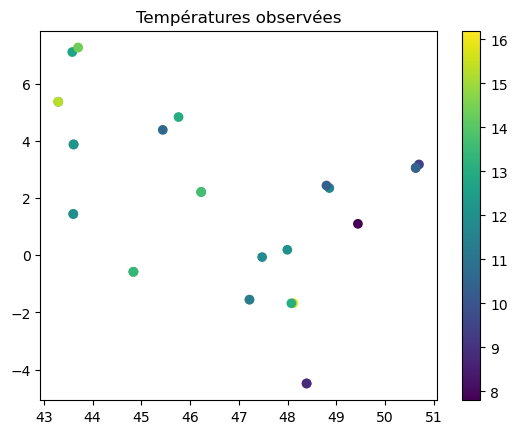

In [25]:
plotxy = plt.scatter(x, y, c=temp)
plotcolor = plt.colorbar(plotxy) #argument 'fraction=' pour reduire la taille de la barre de couleurs
plt.title('Températures observées')

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 6.569887909495222
Full Sill: 7.881962868506297
Range: 12.620335088358729
Nugget: 1.3120749590110752 



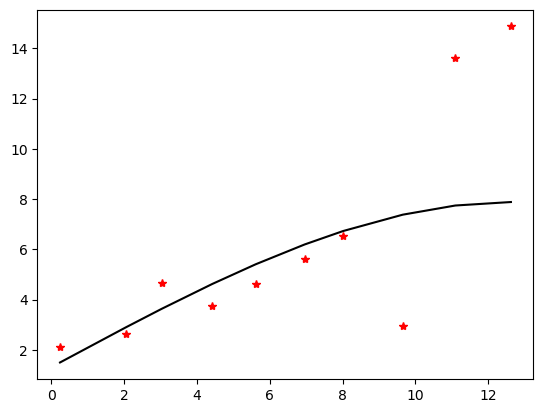

Calculating statistics on variogram model fit...


In [26]:
OK = OrdinaryKriging(
    x, 
    y, 
    temp, 
    variogram_model='spherical',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)

In [27]:
gridx = np.arange(40, 55, 0.1, dtype='float64')
gridy = np.arange(-7, 10, 0.1, dtype='float64')
predi_val, predi_var = OK.execute("grid", gridx, gridy)

Executing Ordinary Kriging...



Text(0.5, 1.0, 'Estimation de la température')

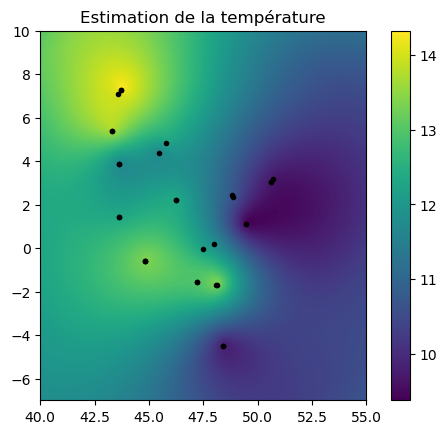

In [28]:
predi_val_plot = plt.imshow(predi_val, extent=(40, 55, -7, 10), origin='lower')
plt.scatter(x, y, c='k', marker='.')
colorbar = plt.colorbar(predi_val_plot)
plt.title('Estimation de la température')

Text(0.5, 1.0, 'Ecart type')

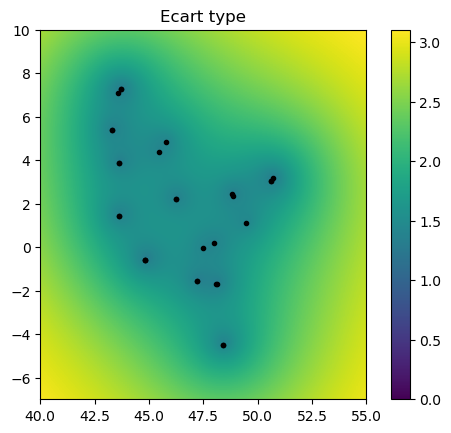

In [29]:
predi_var_plot = plt.imshow(np.sqrt(predi_var), extent=(40, 55, -7, 10), origin='lower', vmin = 0)
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(predi_var_plot)
plt.title('Ecart type')

Text(0.5, 1.0, 'Erreur de variance')

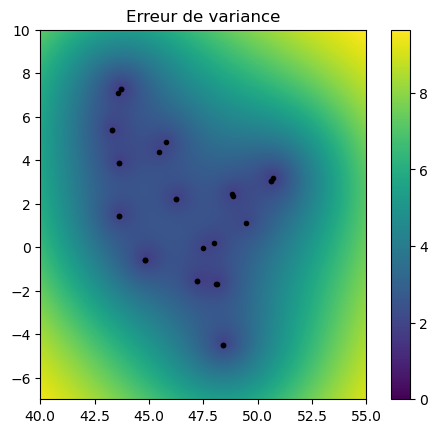

In [30]:
predi_var_plot = plt.imshow(predi_var, extent=(40, 55, -7, 10), origin='lower', vmin = 0)
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(predi_var_plot)
plt.title('Erreur de variance')